In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Import the first dataset about road traffic flows and vehicle-kilometres for 2019 for each vehicle type

In [2]:
vkm_df = pd.read_excel("datasets/laei-2019-major-roads-vkm-flows-speeds.xlsx")

In [3]:
vkm_df.head()

,Year,TOID,LAEI Zone,Borough,Road Classification,AADT Motorcycle,AADT Taxi,AADT Petrol Car,AADT Diesel Car,AADT Electric Car,...,VKM Electric LGV,VKM 2019 - HGVs - Rigid - 2 Axles,VKM 2019 - HGVs - Rigid - 3 Axles,VKM 2019 - HGVs - Rigid - 4 or more Axles,VKM 2019 - HGVs - Articulated - 3 to 4 Axles,VKM 2019 - HGVs - Articulated - 5 Axles,VKM 2019 - HGVs - Articulated - 6 Axles,VKM 2019 - Buses,VKM 2019 - Coaches,VKM 2019 - Total
0,2019,osgb4000000027947700,Non-GLA,Non-GLA,A Road,112,15,5470,3780,32,...,50,3659,736,1451,531,2759,3659,-,327,231749
1,2019,osgb4000000027908760,Non-GLA,Non-GLA,A Road,68,10,3049,2107,18,...,78,1718,344,687,258,1289,1718,-,1160,295268
2,2019,osgb4000000027987795,Non-GLA,Non-GLA,A Road,131,15,5752,3976,34,...,57,1377,275,551,192,1042,1377,-,7746,158880
3,2019,osgb4000000027869099,Non-GLA,Non-GLA,A Road,178,14,7280,5031,43,...,2066,63666,12679,25359,9172,48019,63396,-,97388,4851571
4,2019,osgb4000000030443012,Non-GLA,Non-GLA,A Road,178,34,8433,5828,50,...,11,465,94,185,67,352,465,-,446,43270


In [4]:
vkm_df.shape

(79437, 48)

In [5]:
vkm_df.columns

Index(['Year', 'TOID', 'LAEI Zone', 'Borough', 'Road Classification',
       ' AADT Motorcycle ', ' AADT Taxi ', ' AADT Petrol Car ',
       ' AADT Diesel Car ', ' AADT Electric Car ', ' AADT Petrol PHV ',
       ' AADT Diesel PHV ', ' AADT Electric PHV ', ' AADT Petrol LGV ',
       ' AADT Diesel LGV ', ' AADT Electric LGV ',
       ' AADT 2019 - HGVs - Rigid - 2 Axles ',
       ' AADT 2019 - HGVs - Rigid - 3 Axles ',
       ' AADT 2019 - HGVs - Rigid - 4 or more Axles ',
       ' AADT 2019 - HGVs - Articulated - 3 to 4 Axles ',
       ' AADT 2019 - HGVs - Articulated - 5 Axles ',
       ' AADT 2019 - HGVs - Articulated - 6 Axles ', ' AADT 2019 - Buses ',
       ' AADT 2019 - Coaches ', ' AADT 2019 - Total ',
       ' Speed (km/hr) - Except Buses ', ' Speed (km/hr) - Buses Only ',
       ' Link Length (m) ', ' VKM Motorcycle ', ' VKM Taxi ',
       ' VKM Petrol Car ', ' VKM Diesel Car ', ' VKM Electric Car ',
       ' VKM Petrol PHV ', ' VKM Diesel PHV ', ' VKM Electric PHV ',
       

This dataset likely serves to analyze and estimate vehicle emissions at a road network level, focusing on traffic volume (via AADT and VKM data) and vehicle types (motorcycles, cars, buses, etc.). TOID is a unique identifier for each road segment or link in the road network.

The second dataset includes emissions of key pollutants NOx, PM10, PM2.5 and CO2, and a range of additional pollutants (SO2, CH4, VOC...) in tonnes/year for 2013, 2016, 2019, 2025 and 2030 for each source category at a 1km grid square resolution

In [6]:
emissions_df = pd.read_excel("datasets/LAEI-2019-Emissions-Summary-including-Forecast.xlsx", sheet_name="Emissions by Grid ID")

In [7]:
emissions_df.head()

,Year,Grid ID 2019,LAEI 1km2 ID,Easting,Northing,Borough,Zone,Main Source Category,Sector,Source,...,n2o,nh3,nmvoc,nox,pb,pcb,pm10,pm2.5,so2,Emissions Unit
0,2030,1,5910,510500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019183,0.019183,NaN,tonnes/annum
1,2030,2,5911,511500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.015719,0.015719,NaN,tonnes/annum
2,2030,3,5912,512500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019878,0.019878,NaN,tonnes/annum
3,2030,4,5915,515500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020946,0.020946,NaN,tonnes/annum
4,2030,5,5916,516500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020105,0.020105,NaN,tonnes/annum


In [8]:
emissions_df.shape

(699120, 30)

In [9]:
emissions_df.columns

Index(['Year', 'Grid ID 2019', 'LAEI 1km2 ID', 'Easting', 'Northing',
       'Borough', 'Zone', 'Main Source Category', 'Sector', 'Source', 'bap',
       'cd', 'c4h6', 'c6h6', 'ch4', 'co', 'co2', 'hc', 'hcl', 'hg', 'n2o',
       'nh3', 'nmvoc', 'nox', 'pb', 'pcb', 'pm10', 'pm2.5', 'so2',
       'Emissions Unit'],
      dtype='object')

We can use the location related columns in this dataset to connect it to the concentration dataset. Easting and Northing are the X and Y in the concentration dataset.

We can divide the dataset by pollutant type and year

In [10]:
emissions_PM10_df = emissions_df[emissions_df['pm10'].notna()]

In [11]:
emissions_PM10_df.head()

,Year,Grid ID 2019,LAEI 1km2 ID,Easting,Northing,Borough,Zone,Main Source Category,Sector,Source,...,n2o,nh3,nmvoc,nox,pb,pcb,pm10,pm2.5,so2,Emissions Unit
0,2030,1,5910,510500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019183,0.019183,NaN,tonnes/annum
1,2030,2,5911,511500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.015719,0.015719,NaN,tonnes/annum
2,2030,3,5912,512500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019878,0.019878,NaN,tonnes/annum
3,2030,4,5915,515500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020946,0.020946,NaN,tonnes/annum
4,2030,5,5916,516500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020105,0.020105,NaN,tonnes/annum


This is the data about the year 2019 for PM10

In [12]:
emissions2019_PM10_df = emissions_df[(emissions_df['pm10'].notna()) & (emissions_df['Year'] == 2019)]

In [13]:
emissions2019_PM10_df.shape

(140516, 30)

In [14]:
other_pol_columns = ['Year','bap', 'cd', 'c4h6', 'c6h6', 'ch4', 'co', 'co2', 'hc', 
                     'hcl', 'hg', 'n2o','nh3', 'nmvoc', 'nox', 'pb', 'pcb', 'so2','Emissions Unit']

In [15]:
emissions2019_PM10_df = emissions2019_PM10_df.drop(columns=other_pol_columns)

In [16]:
for column in emissions2019_PM10_df[['Main Source Category','Sector', 'Source']]:
    print(f"Value counts for column: {column}")
    print(emissions2019_PM10_df[column].value_counts())
    print("\n")

Value counts for column: Main Source Category
Main Source Category
Transport                    71316
Industrial and Commercial    41520
Domestic                     13840
Miscellaneous                10380
Resuspension                  3460
Name: count, dtype: int64


Value counts for column: Sector
Sector
Road Transport               50556
Heat and Power Generation    13840
Industrial Processes         10380
Waste                        10380
River                        10380
Construction                  6920
Rail                          6920
Biomass                       3460
Machinery                     3460
Commercial Cooking            3460
Gas Leakage                   3460
Accidental Fires              3460
Agriculture                   3460
Forestry                      3460
Resuspension                  3460
Aviation                      3460
Name: count, dtype: int64


Value counts for column: Source
Source
Oil/Coal Combustion               6920
NRMM Exhaust             

In [17]:
emissions2019_PM10_df.head()

,Grid ID 2019,LAEI 1km2 ID,Easting,Northing,Borough,Zone,Main Source Category,Sector,Source,pm10,pm2.5
285264,1,5910,510500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,0.021923,0.021923
285265,2,5911,511500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,0.017965,0.017965
285266,3,5912,512500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,0.022718,0.022718
285267,4,5915,515500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,0.023939,0.023939
285268,5,5916,516500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,0.022977,0.022977


The third dataset is about road transport emissions (NOx, PM10, PM2.5, and CO2) for 2019, 2025, and 2030, and includes data by vehicle type and specific PM emissions (exhaust, brake wear, and tire wear). there is a different sheet for each of the four pollutants (NOx, PM10, PM2.5, and CO2) in the Excel file that needs to be specified in the sheet_name parameter when loading the data

This one is the sheet about PM10

In [18]:
emissionsroads_PM10_df = pd.read_excel("datasets/LAEI2019-nox-pm-co2-major-roads-link-emissions.xlsx", sheet_name="PM10 Road Link Emissions")

In [19]:
emissionsroads_PM10_df.shape

(238317, 52)

In [20]:
emissionsroads_PM10_df.head()

,TOID,pollutant,pm-source,emissions-units,Road-Car-Petrol-2019,Road-Car-Petrol-2025,Road-Car-Petrol-2030,Road-Car-Diesel-2019,Road-Car-Diesel-2025,Road-Car-Diesel-2030,...,Road-Non-TfL-Bus-or-Coach-2030,Road-Taxi-2019,Road-Taxi-2025,Road-Taxi-2030,Road-Motorcycle-2019,Road-Motorcycle-2025,Road-Motorcycle-2030,Road-Total-2019,Road-Total-2025,Road-Total-2030
0,osgb4000000027865913,pm10,exhaust,tonnes/year,0.027772,0.026916,0.021559,0.119410,0.023310,0.006968,...,0.000940,0.000467,0.000058,0.000052,0.002146,0.001608,0.001419,0.273490,0.074153,0.042511
1,osgb4000000027865914,pm10,exhaust,tonnes/year,0.027955,0.028748,0.023069,0.119109,0.024336,0.007216,...,0.001115,0.000786,0.000099,0.000083,0.002184,0.001752,0.001540,0.314744,0.083489,0.047803
2,osgb4000000027865915,pm10,exhaust,tonnes/year,0.025853,0.029750,0.033082,0.107461,0.032148,0.018957,...,0.000679,0.000975,0.000083,0.000073,0.001652,0.001315,0.001357,0.320484,0.137564,0.099260
3,osgb4000000027865916,pm10,exhaust,tonnes/year,0.030315,0.037069,0.041507,0.121762,0.034694,0.020029,...,0.000540,0.000818,0.000078,0.000062,0.001762,0.001393,0.001447,0.361042,0.152194,0.108697
4,osgb4000000027865917,pm10,exhaust,tonnes/year,0.017942,0.021212,0.023505,0.072647,0.020763,0.011928,...,0.000471,0.000900,0.000076,0.000065,0.001078,0.000852,0.000877,0.223138,0.092968,0.065531


In [21]:
emissionsroads_PM10_df.shape

(238317, 52)

In [22]:
emissionsroads_PM10_df.columns

Index(['TOID', 'pollutant', 'pm-source', 'emissions-units',
       'Road-Car-Petrol-2019', 'Road-Car-Petrol-2025', 'Road-Car-Petrol-2030',
       'Road-Car-Diesel-2019', 'Road-Car-Diesel-2025', 'Road-Car-Diesel-2030',
       'Road-Car-Electric-2019', 'Road-Car-Electric-2025',
       'Road-Car-Electric-2030', 'Road-PHV-Petrol-2019',
       'Road-PHV-Petrol-2025', 'Road-PHV-Petrol-2030', 'Road-PHV-Diesel-2019',
       'Road-PHV-Diesel-2025', 'Road-PHV-Diesel-2030',
       'Road-PHV-Electric-2019', 'Road-PHV-Electric-2025',
       'Road-PHV-Electric-2030', 'Road-LGV-Petrol-2019',
       'Road-LGV-Petrol-2025', 'Road-LGV-Petrol-2030', 'Road-LGV-Diesel-2019',
       'Road-LGV-Diesel-2025', 'Road-LGV-Diesel-2030',
       'Road-LGV-Electric-2019', 'Road-LGV-Electric-2025',
       'Road-LGV-Electric-2030', 'Road-HGV-Rigid-2019', 'Road-HGV-Rigid-2025',
       'Road-HGV-Rigid-2030', 'Road-HGV-Articulated-2019',
       'Road-HGV-Articulated-2025', 'Road-HGV-Articulated-2030',
       'Road-TfL-Bus

We can find all columns related to emissions in 2025 and 2030 and drop them

In [23]:
columns_to_drop = emissionsroads_PM10_df.filter(regex='2025|2030').columns

In [24]:
columns_to_drop

Index(['Road-Car-Petrol-2025', 'Road-Car-Petrol-2030', 'Road-Car-Diesel-2025',
       'Road-Car-Diesel-2030', 'Road-Car-Electric-2025',
       'Road-Car-Electric-2030', 'Road-PHV-Petrol-2025',
       'Road-PHV-Petrol-2030', 'Road-PHV-Diesel-2025', 'Road-PHV-Diesel-2030',
       'Road-PHV-Electric-2025', 'Road-PHV-Electric-2030',
       'Road-LGV-Petrol-2025', 'Road-LGV-Petrol-2030', 'Road-LGV-Diesel-2025',
       'Road-LGV-Diesel-2030', 'Road-LGV-Electric-2025',
       'Road-LGV-Electric-2030', 'Road-HGV-Rigid-2025', 'Road-HGV-Rigid-2030',
       'Road-HGV-Articulated-2025', 'Road-HGV-Articulated-2030',
       'Road-TfL-Bus-2025', 'Road-TfL-Bus-2030',
       'Road-Non-TfL-Bus-or-Coach-2025', 'Road-Non-TfL-Bus-or-Coach-2030',
       'Road-Taxi-2025', 'Road-Taxi-2030', 'Road-Motorcycle-2025',
       'Road-Motorcycle-2030', 'Road-Total-2025', 'Road-Total-2030'],
      dtype='object')

In [25]:
emissionsroads2019_PM10_df = emissionsroads_PM10_df.drop(columns=columns_to_drop)

This is the data about 2019 PM10 emissions by road. It can be merged with the first dataset (traffic) using the TOID column

In [26]:
emissionsroads2019_PM10_df.shape

(238317, 20)

In [27]:
emissionsroads2019_PM10_df.columns

Index(['TOID', 'pollutant', 'pm-source', 'emissions-units',
       'Road-Car-Petrol-2019', 'Road-Car-Diesel-2019',
       'Road-Car-Electric-2019', 'Road-PHV-Petrol-2019',
       'Road-PHV-Diesel-2019', 'Road-PHV-Electric-2019',
       'Road-LGV-Petrol-2019', 'Road-LGV-Diesel-2019',
       'Road-LGV-Electric-2019', 'Road-HGV-Rigid-2019',
       'Road-HGV-Articulated-2019', 'Road-TfL-Bus-2019',
       'Road-Non-TfL-Bus-or-Coach-2019', 'Road-Taxi-2019',
       'Road-Motorcycle-2019', 'Road-Total-2019'],
      dtype='object')

Finally, the fourth datasets are about concentration. We have four files and each of them contains concentration data for a specific pollutants (PM10m, PM10d, NO2, NOx, PM2.5)

In [28]:
concentrations_PM10_df = pd.read_csv("datasets/laei_LAEI2019v3_CorNOx15_PM10m.csv")

In [29]:
concentrations_PM10_df.head()

,x,y,conc
0,519100,203440,15.09522
1,519120,203440,15.51029
2,519140,203440,16.40831
3,519160,203440,15.87096
4,519180,203440,15.34885


In [30]:
concentrations_PM10_df.shape

(5851964, 3)

In [31]:
concentrations_PM10_df.columns

Index(['x', 'y', 'conc'], dtype='object')

Let's rename the concentrations columns x and y to Easting and Northing so we can marge this dataset with the one about PM10 emissions. Easting (horizontal (x-axis) coordinate) and Northing (vertical (y-axis) coordinate) are coordinates used in mapping and geographic information systems (GIS) to specify locations on a grid

In [32]:
concentrations_PM10_df.rename(columns={'x': 'Easting', 'y': 'Northing'}, inplace=True)

The emissions2019_PM10 has 140516 rows while the concentrations_PM10 has 5851964 rows. This means that the concentration data is recorded at a finer spatial resolution (smaller grid cells or more detailed points). An inner merge will retain only the rows where both datasets have matching spatial coordinates (Easting and Northing). Since the concentration data is on a finer grid, this ensures you're only keeping the concentration points that align with emissions data.

In [33]:
PM10_merged_df = pd.merge(emissions2019_PM10_df, concentrations_PM10_df, on=['Easting', 'Northing'], how='inner')


In [34]:
PM10_merged_df.shape

(134595, 12)

In [35]:
PM10_merged_df.columns


Index(['Grid ID 2019', 'LAEI 1km2 ID', 'Easting', 'Northing', 'Borough',
       'Zone', 'Main Source Category', 'Sector', 'Source', 'pm10', 'pm2.5',
       'conc'],
      dtype='object')

In [44]:
PM10_merged_df[['pm10', 'conc']].describe()

,pm10,conc
count,134595.000000,134595.000000
mean,0.064948,15.414991
std,0.704482,2.591664
min,0.000000,12.215170
25%,0.000000,13.702890
50%,0.000838,14.933130
75%,0.019089,16.303560
max,114.906839,45.239320


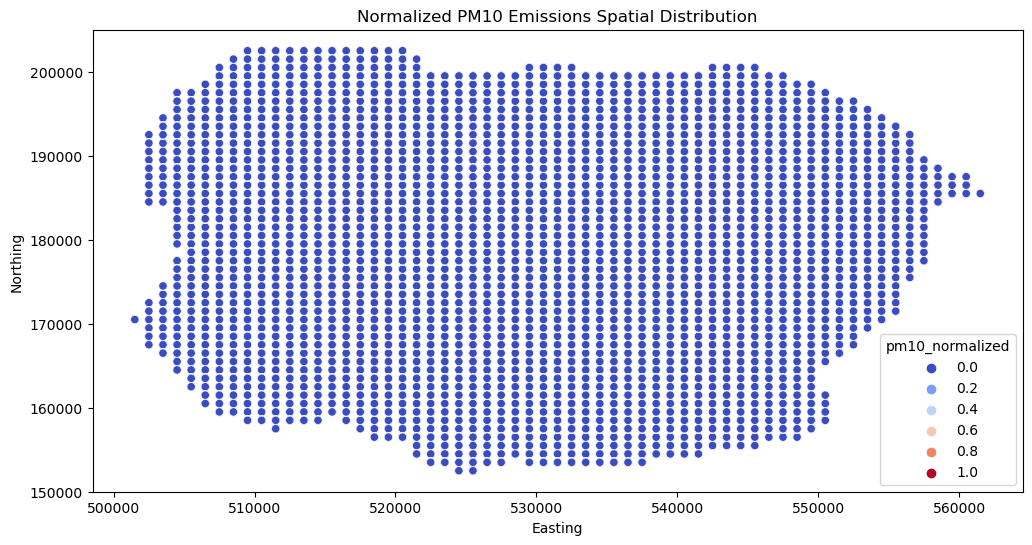

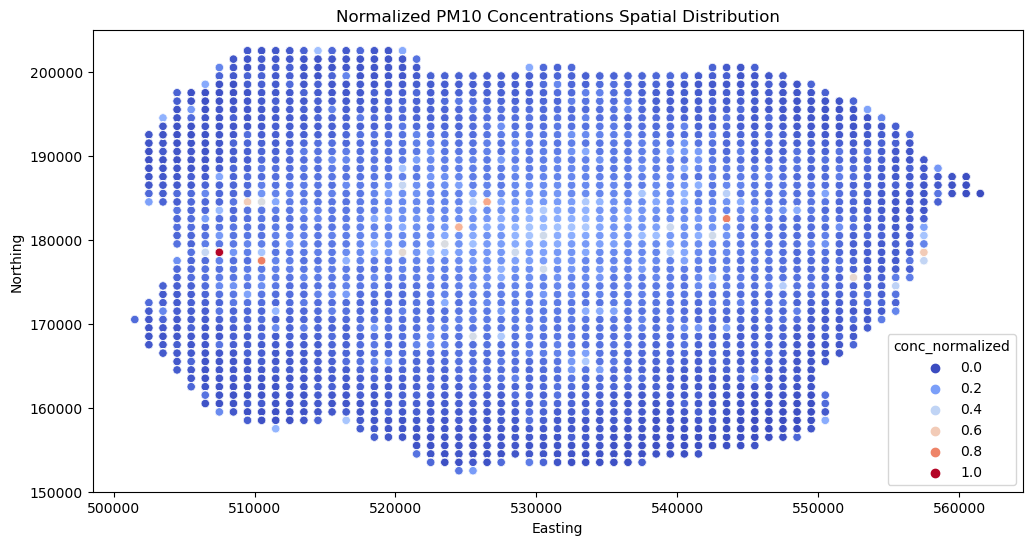

In [47]:
scaler = MinMaxScaler()

# Apply the scaler to 'pm10' and 'conc'
PM10_merged_df[['pm10_normalized', 'conc_normalized']] = scaler.fit_transform(PM10_merged_df[['pm10', 'conc']])

# Plot the scatter plots again using the normalized values
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Easting', y='Northing', hue='pm10_normalized', data=PM10_merged_df, palette='coolwarm')
plt.title('Normalized PM10 Emissions Spatial Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Easting', y='Northing', hue='conc_normalized', data=PM10_merged_df, palette='coolwarm')
plt.title('Normalized PM10 Concentrations Spatial Distribution')
plt.show()

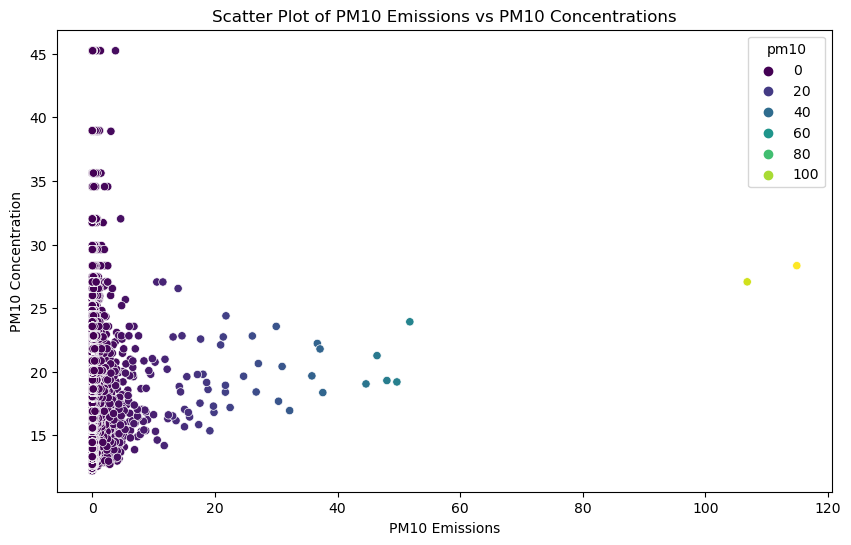

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pm10', y='conc', data=PM10_merged_df, hue='pm10', palette='viridis')
plt.title('Scatter Plot of PM10 Emissions vs PM10 Concentrations')
plt.xlabel('PM10 Emissions')
plt.ylabel('PM10 Concentration')
plt.show()

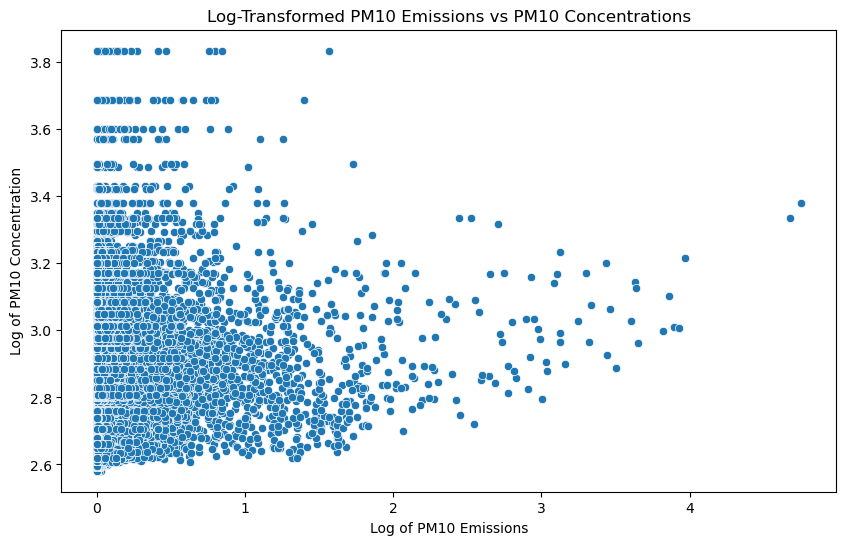

In [49]:
PM10_merged_df['log_pm10'] = np.log1p(PM10_merged_df['pm10'])  # log(1 + x) to avoid log(0) issues
PM10_merged_df['log_conc'] = np.log1p(PM10_merged_df['conc'])

# Scatter plot after log transformation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_pm10', y='log_conc', data=PM10_merged_df)
plt.title('Log-Transformed PM10 Emissions vs PM10 Concentrations')
plt.xlabel('Log of PM10 Emissions')
plt.ylabel('Log of PM10 Concentration')
plt.show()

In [ ]:
merged_df = vkm_df.merge(emissionsroads2019_PM10_df, on='TOID', how='left')


In [ ]:
merged_df.shape

In [ ]:
merged_df['TOID'].duplicated().sum()